# Easi, EG38, raw proteins

- Diagnosis: MDS
- BM blasts: 12%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
adata.obs['batch_group'] 

AAACCTGAGCCCTAAT-1-100    Easi
AAACCTGCAAGCCGCT-1-100    Easi
AAACCTGCACTGTCGG-1-100    Easi
AAACCTGCAGACGCTC-1-100    Easi
AAACCTGTCCTTAATC-1-100    Easi
                          ... 
TTTGTCAGTACATCCA-1-158    Easi
TTTGTCAGTAGGCATG-1-158    Easi
TTTGTCAGTATGCTTG-1-158    Easi
TTTGTCATCAAACCAC-1-158    Easi
TTTGTCATCCATGAAC-1-158    Easi
Name: batch_group, Length: 121340, dtype: category
Categories (1, object): ['Easi']

In [4]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

adata_easi

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [5]:
adata_easi.obs['POOL'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [6]:
adata_easi.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [7]:
#select sample from Easigenomics dataset

adata_sample=adata_easi[adata_easi.obs['POOL'] == 'EG38']

In [8]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 681 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [9]:
adata_sample.obs['new_cell_type'].unique().tolist()

['preleukemic', 'non-leukemic?', 'NK', 'non-leukemic']

In [10]:
adata_sample.obs['POOL'].unique().tolist()

['EG38']

In [11]:
#Select only NK-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [12]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 34 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [13]:
#Two types of NK cells annotated by Seurat

adata_nk.obs['cell_type']

AACCGCGGTTGTGGCC-1-101    NKT
ACATACGCAGACGCTC-1-101    NKT
ACCCACTTCTCGTATT-1-101    NKT
AGATTGCAGCAGATCG-1-101    NKT
CAAGGCCCATTCGACA-1-101    NKT
CAGCTAAAGCGAGAAA-1-101    NKT
CAGGTGCGTCTCTCGT-1-101    NKT
CATCAGAAGCCGATTT-1-101    NKT
CCGGTAGAGATGAGAG-1-101    NKT
CGGACTGGTCCTCCAT-1-101    NKT
CGTCTACCACTACAGT-1-101    NKT
CTCGAGGTCGTCCGTT-1-101    NKT
CTGCCTAAGCCTATGT-1-101    NKT
GAACGGAAGTCAAGGC-1-101    NKT
GATCTAGGTTCGAATC-1-101    NKT
GCAGTTACAAGAAGAG-1-101    NKT
GCGACCACAAACTGTC-1-101    NKT
GCGCAGTCAAAGCAAT-1-101    NKT
GCGCGATAGTAGCCGA-1-101    NKT
GCTGCGATCACTTACT-1-101    NKT
GGAAAGCAGACAGAGA-1-101    NKT
GGAAAGCGTTCGGCAC-1-101    NKT
GGGCATCAGGGAACGG-1-101    NKT
GGTGAAGTCGGACAAG-1-101    NKT
GTCTCGTTCACGACTA-1-101    NKT
GTTTCTATCGGAAACG-1-101    NKT
TACGGTATCACTGGGC-1-101    NKT
TCGTACCTCGCCTGTT-1-101    NKT
TGACGGCTCTTCCTTC-1-101    NKT
TGAGAGGGTCCGAACC-1-101    NKT
TGCTGCTAGAGGACGG-1-101    NKT
TGGCGCAGTATGAATG-1-101    NKT
TGGCGCAGTTGGGACA-1-101    NKT
TTGGAACCAG

In [14]:
#surface protein expression of NK- and T-cells
nk_prot=adata_nk.obsm['protein_expression_dsb']

In [15]:
#surface protein expression of whole sample
prot=adata_sample.obsm['protein_expression_dsb']

In [16]:
#NK- and T-cells in sample
nk_prot.shape

(34, 33)

In [17]:
#All cells in sample

prot.shape

(681, 33)

In [18]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


In [19]:
#To exclude columns that contain only zeros from NKT-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


In [20]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [21]:
#sorting by mean, NKT cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 681 cells in the sample


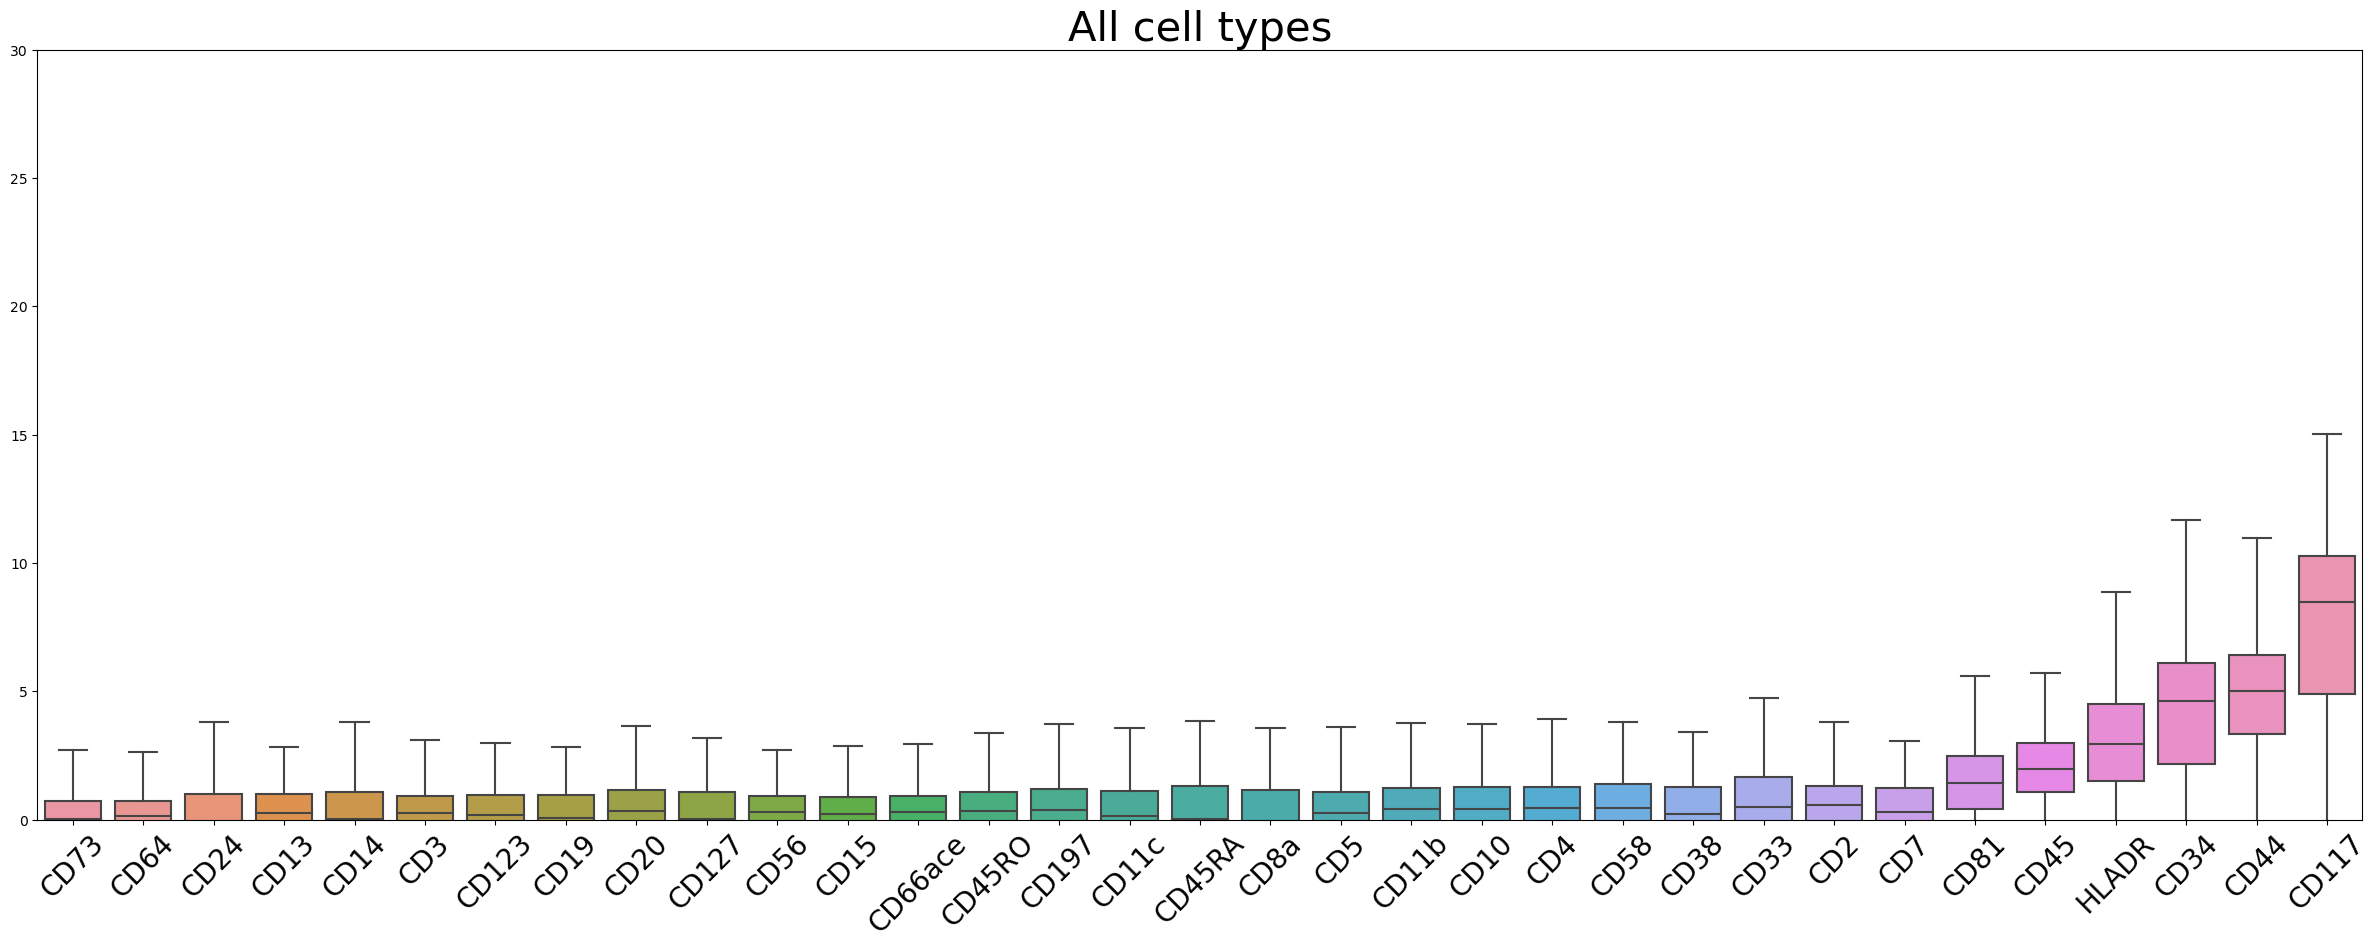

In [43]:
#All cell types

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 30)
a=sns.boxplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)




In total: 34 NK- and T-cells in the sample


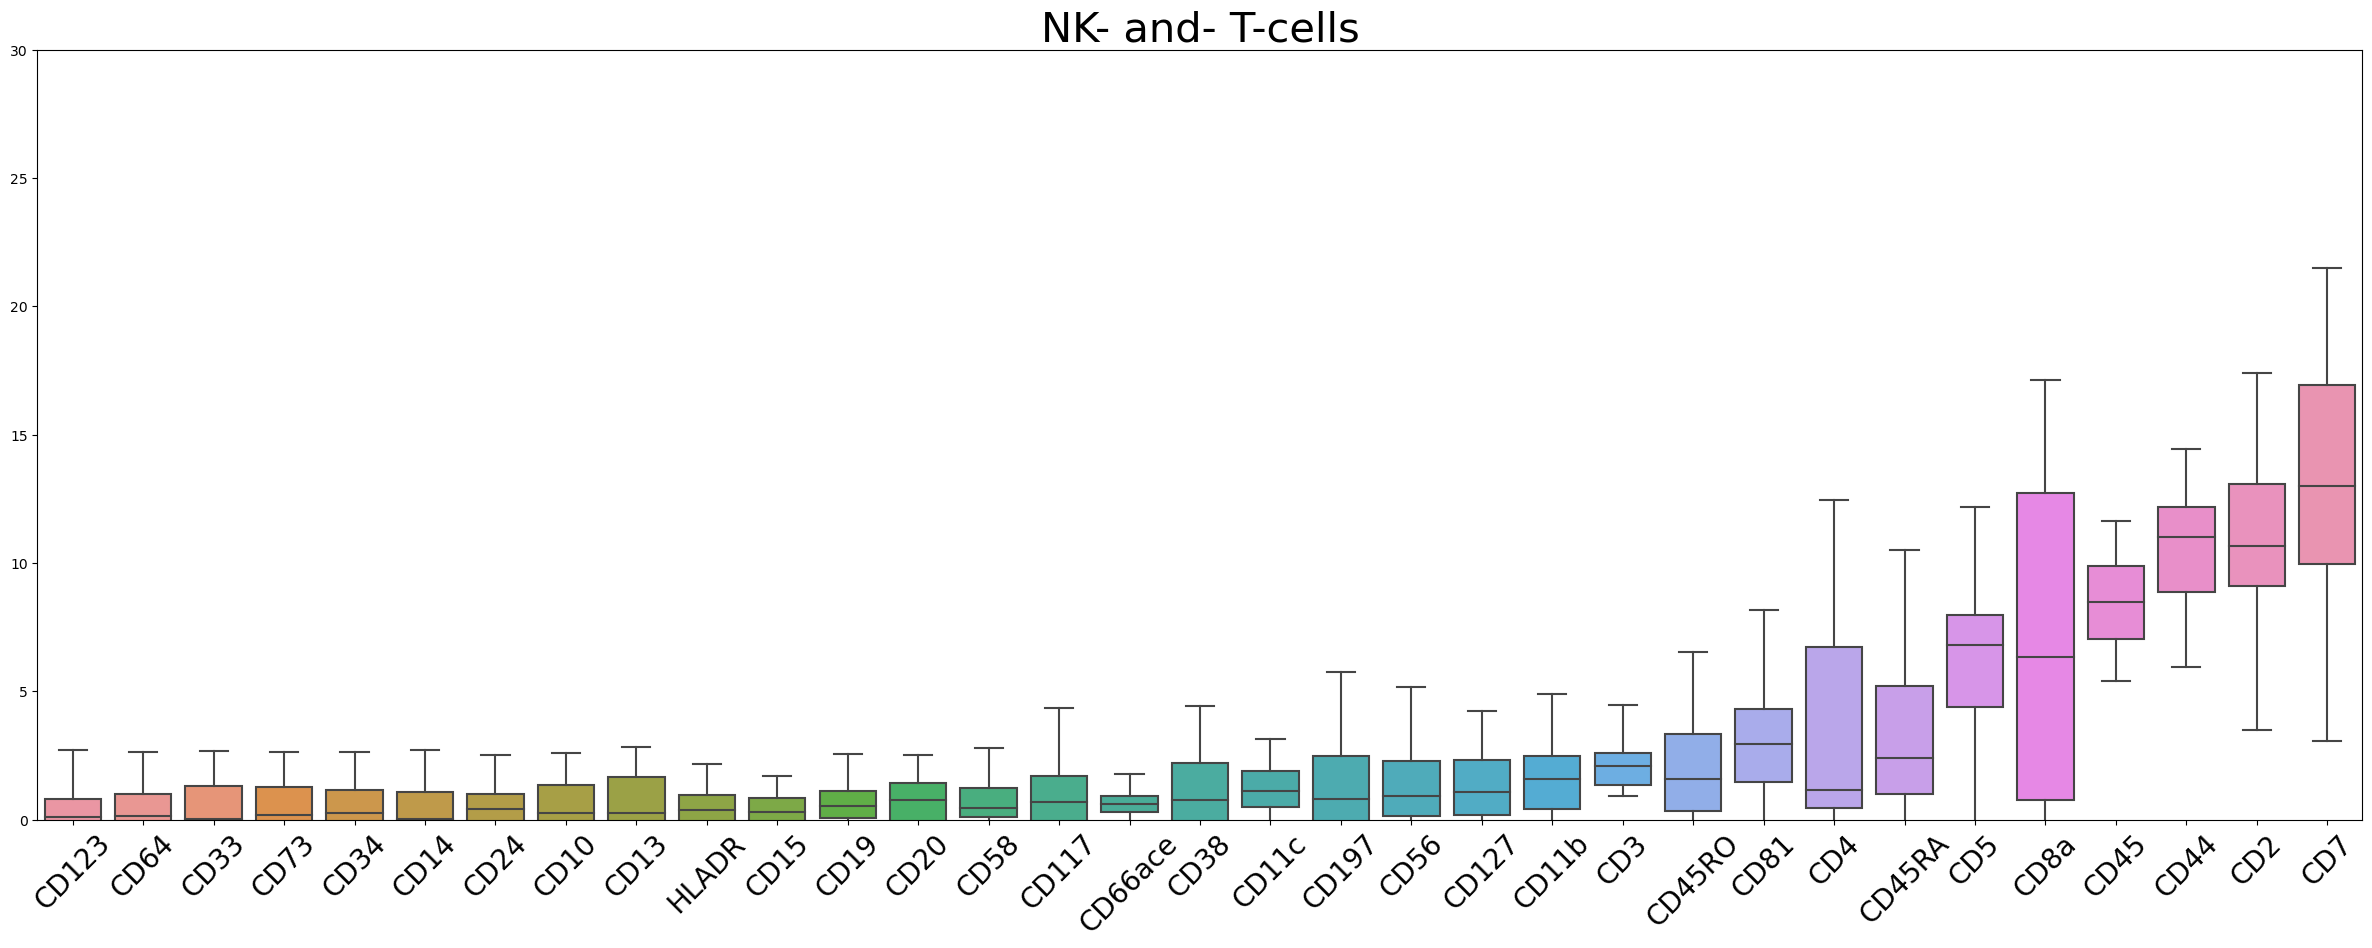

In [44]:
#NK- and T-cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 30)
a=sns.boxplot(data=df_sorted_nk,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and- T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)


In total: 681 cells in the sample


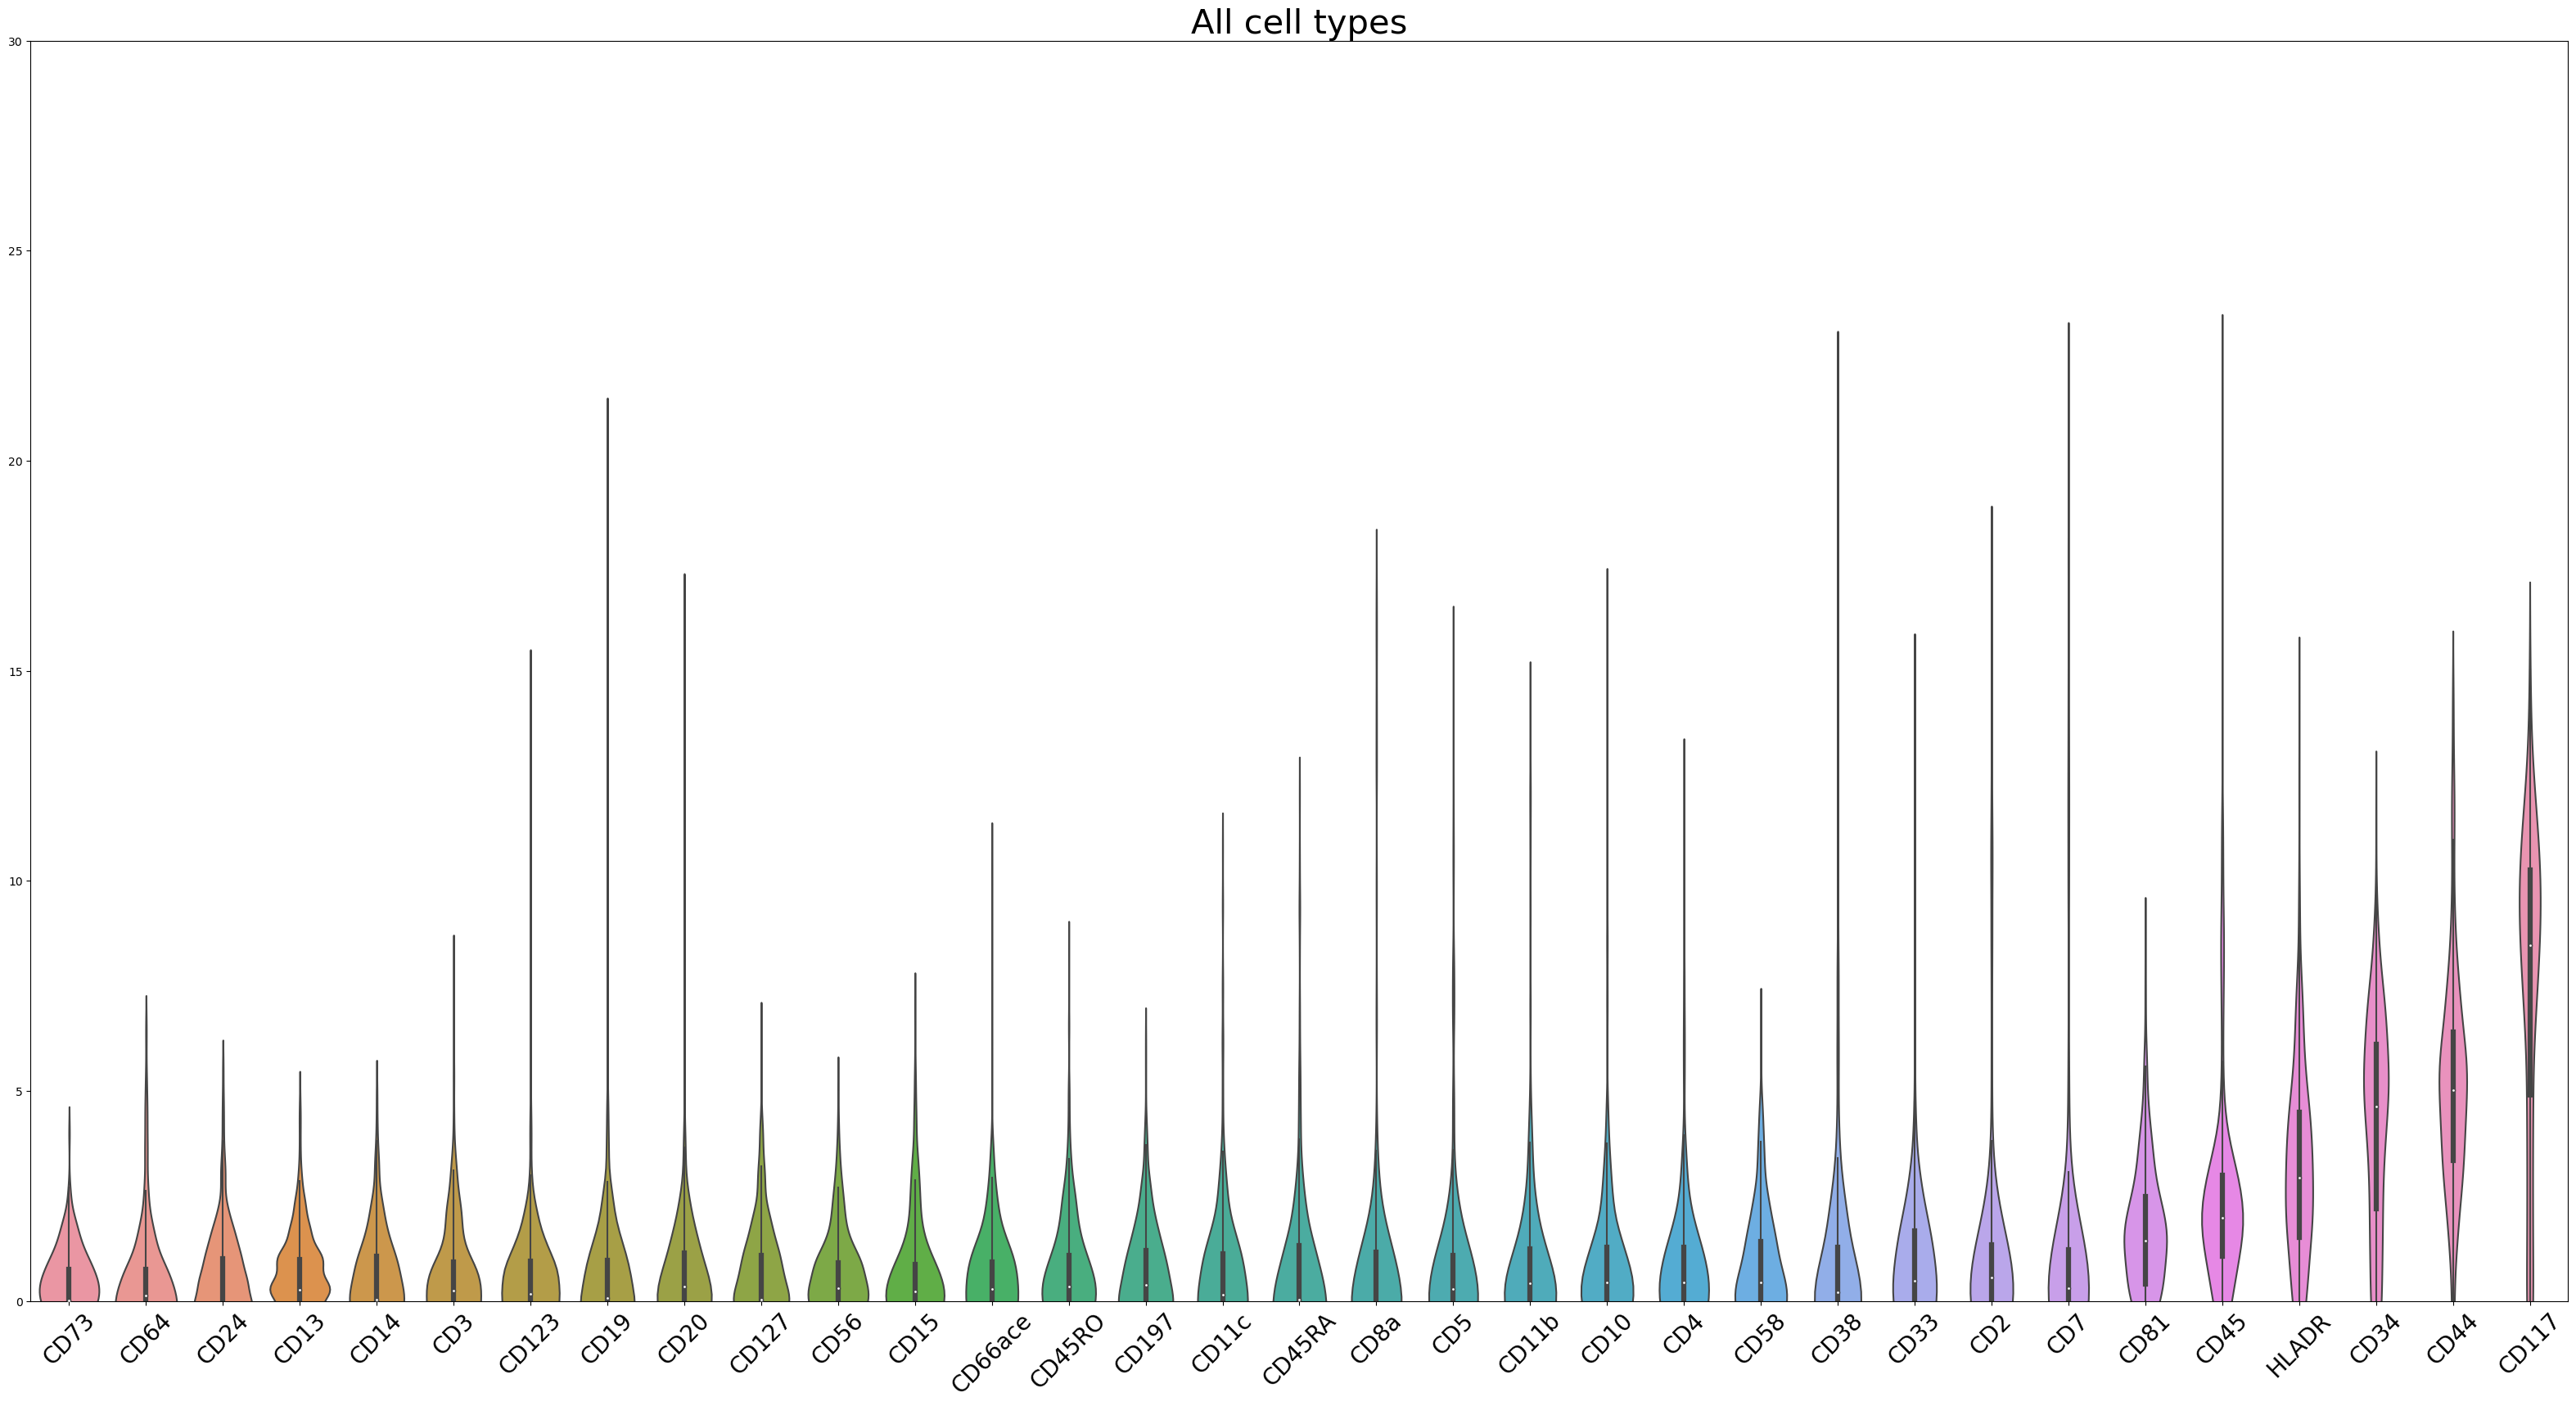

In [45]:
#All cells

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 30)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

In total: 34 NK- and T-cells in the sample


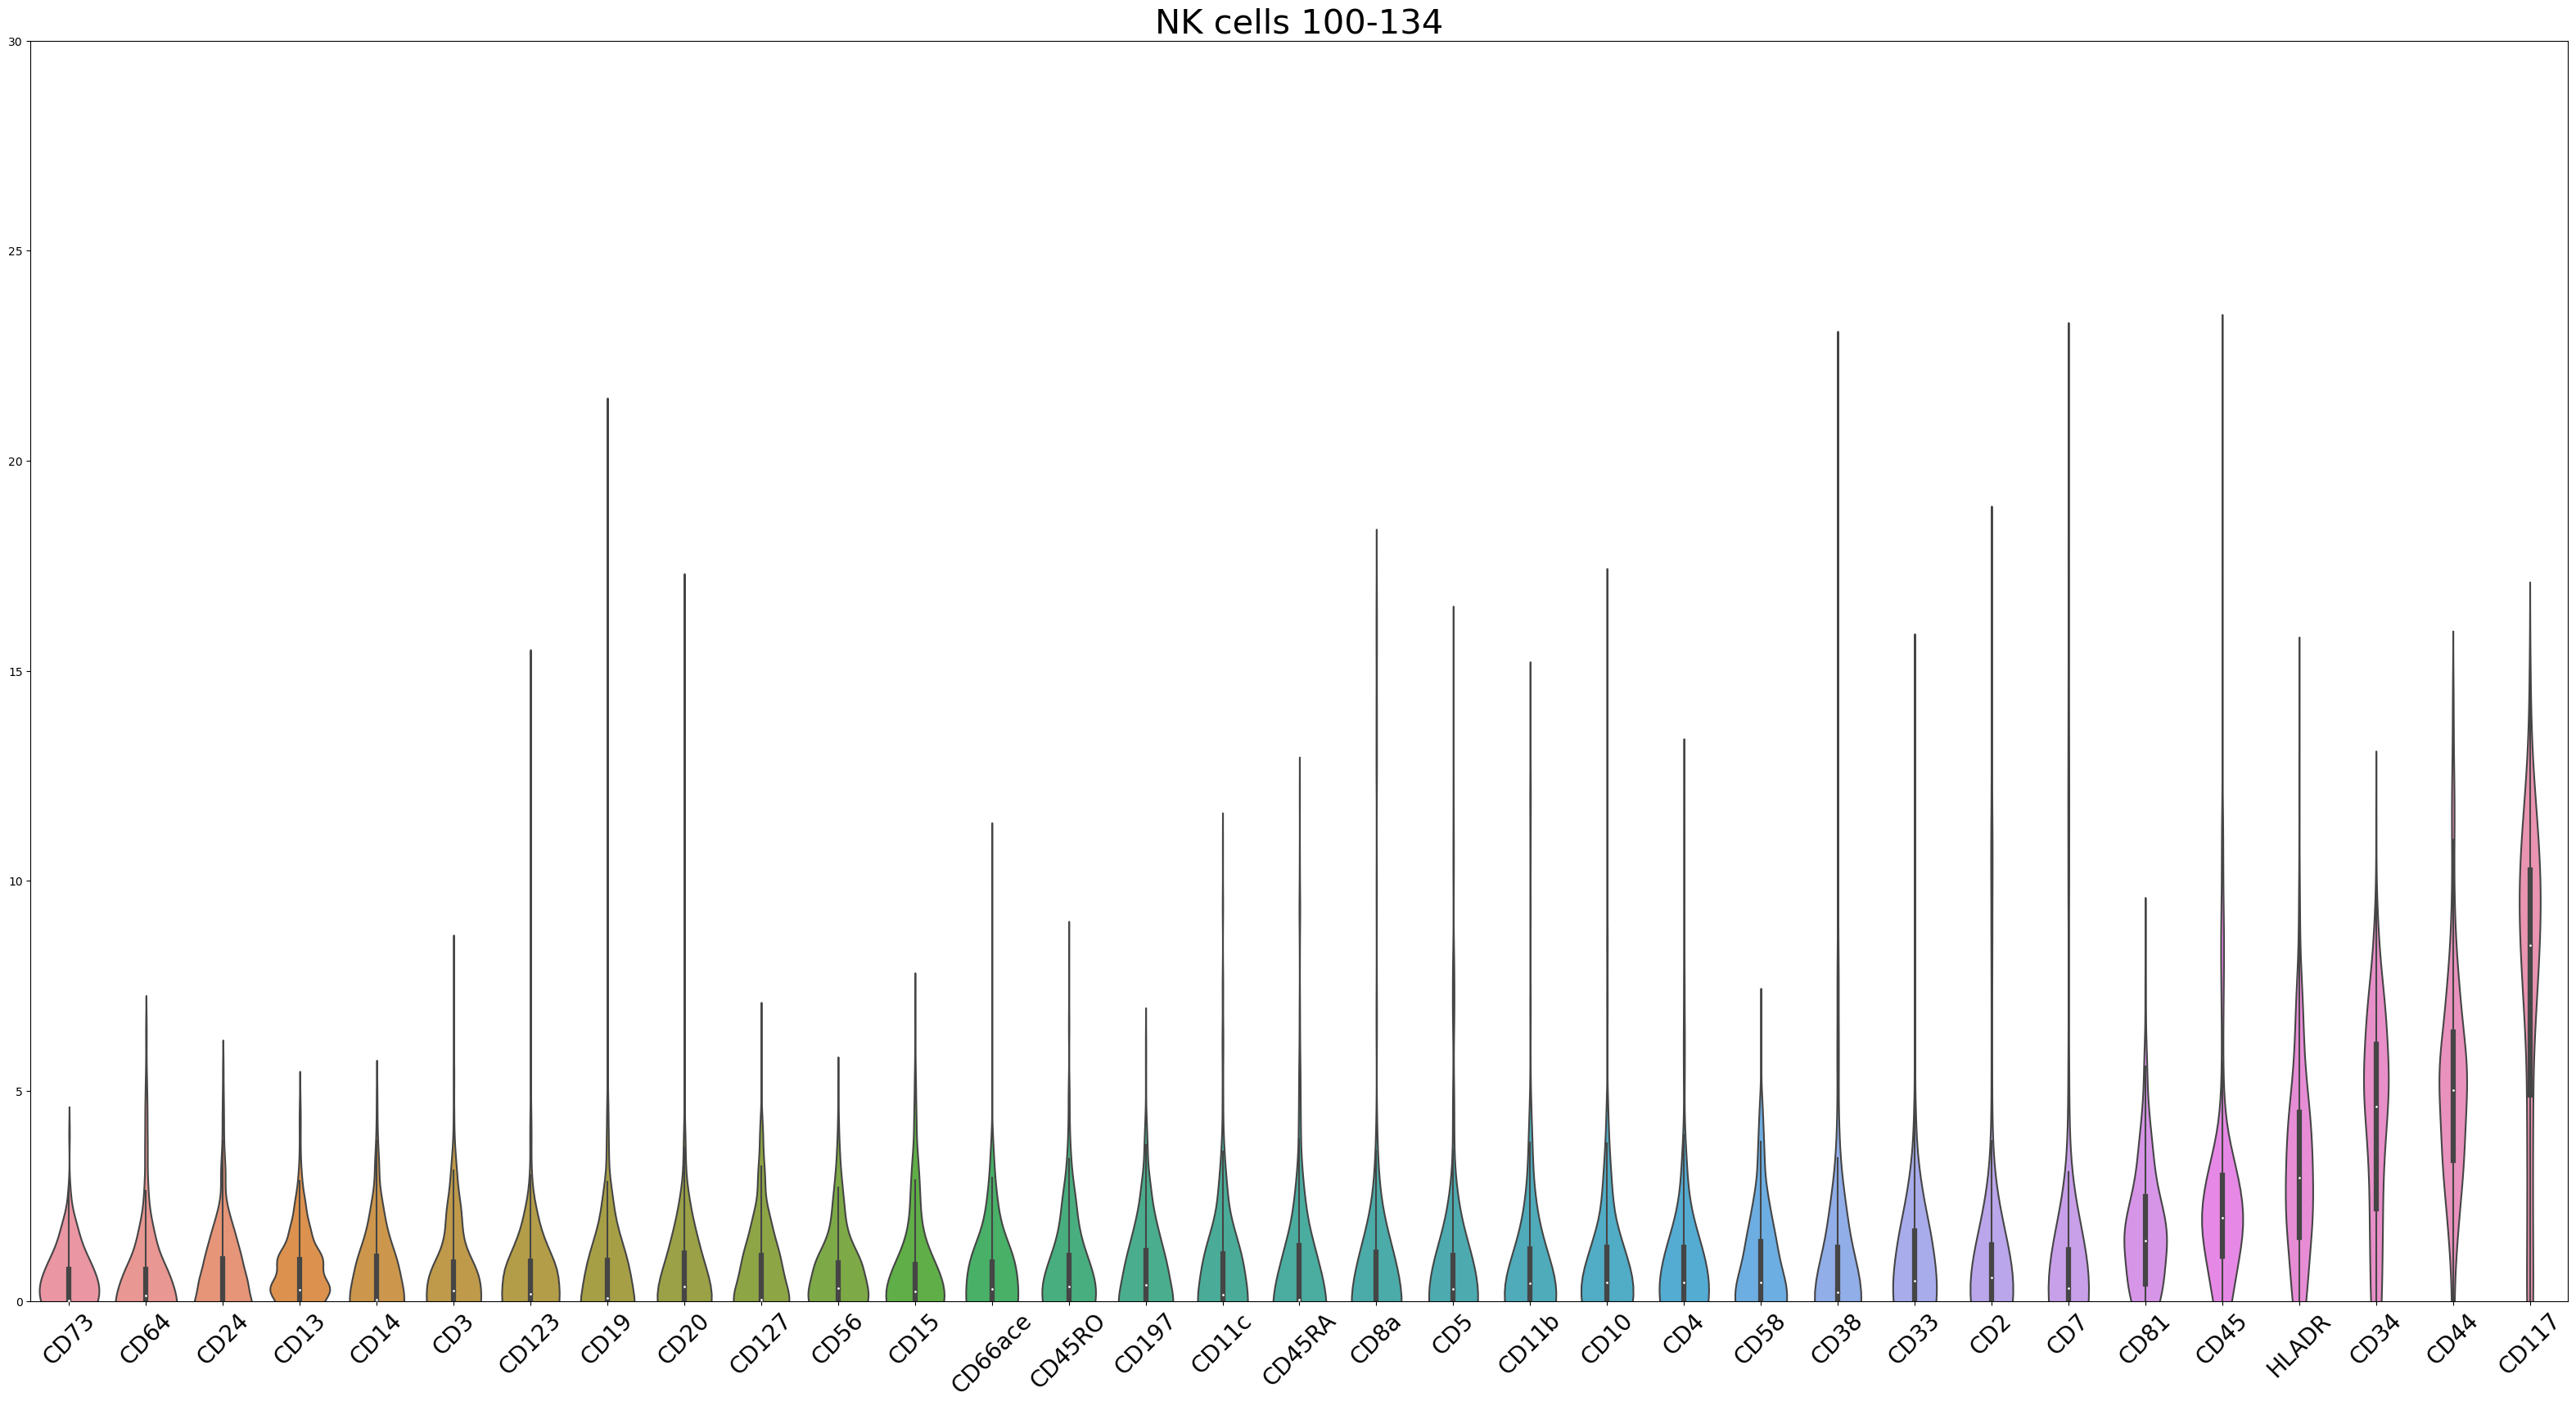

In [46]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 30)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)



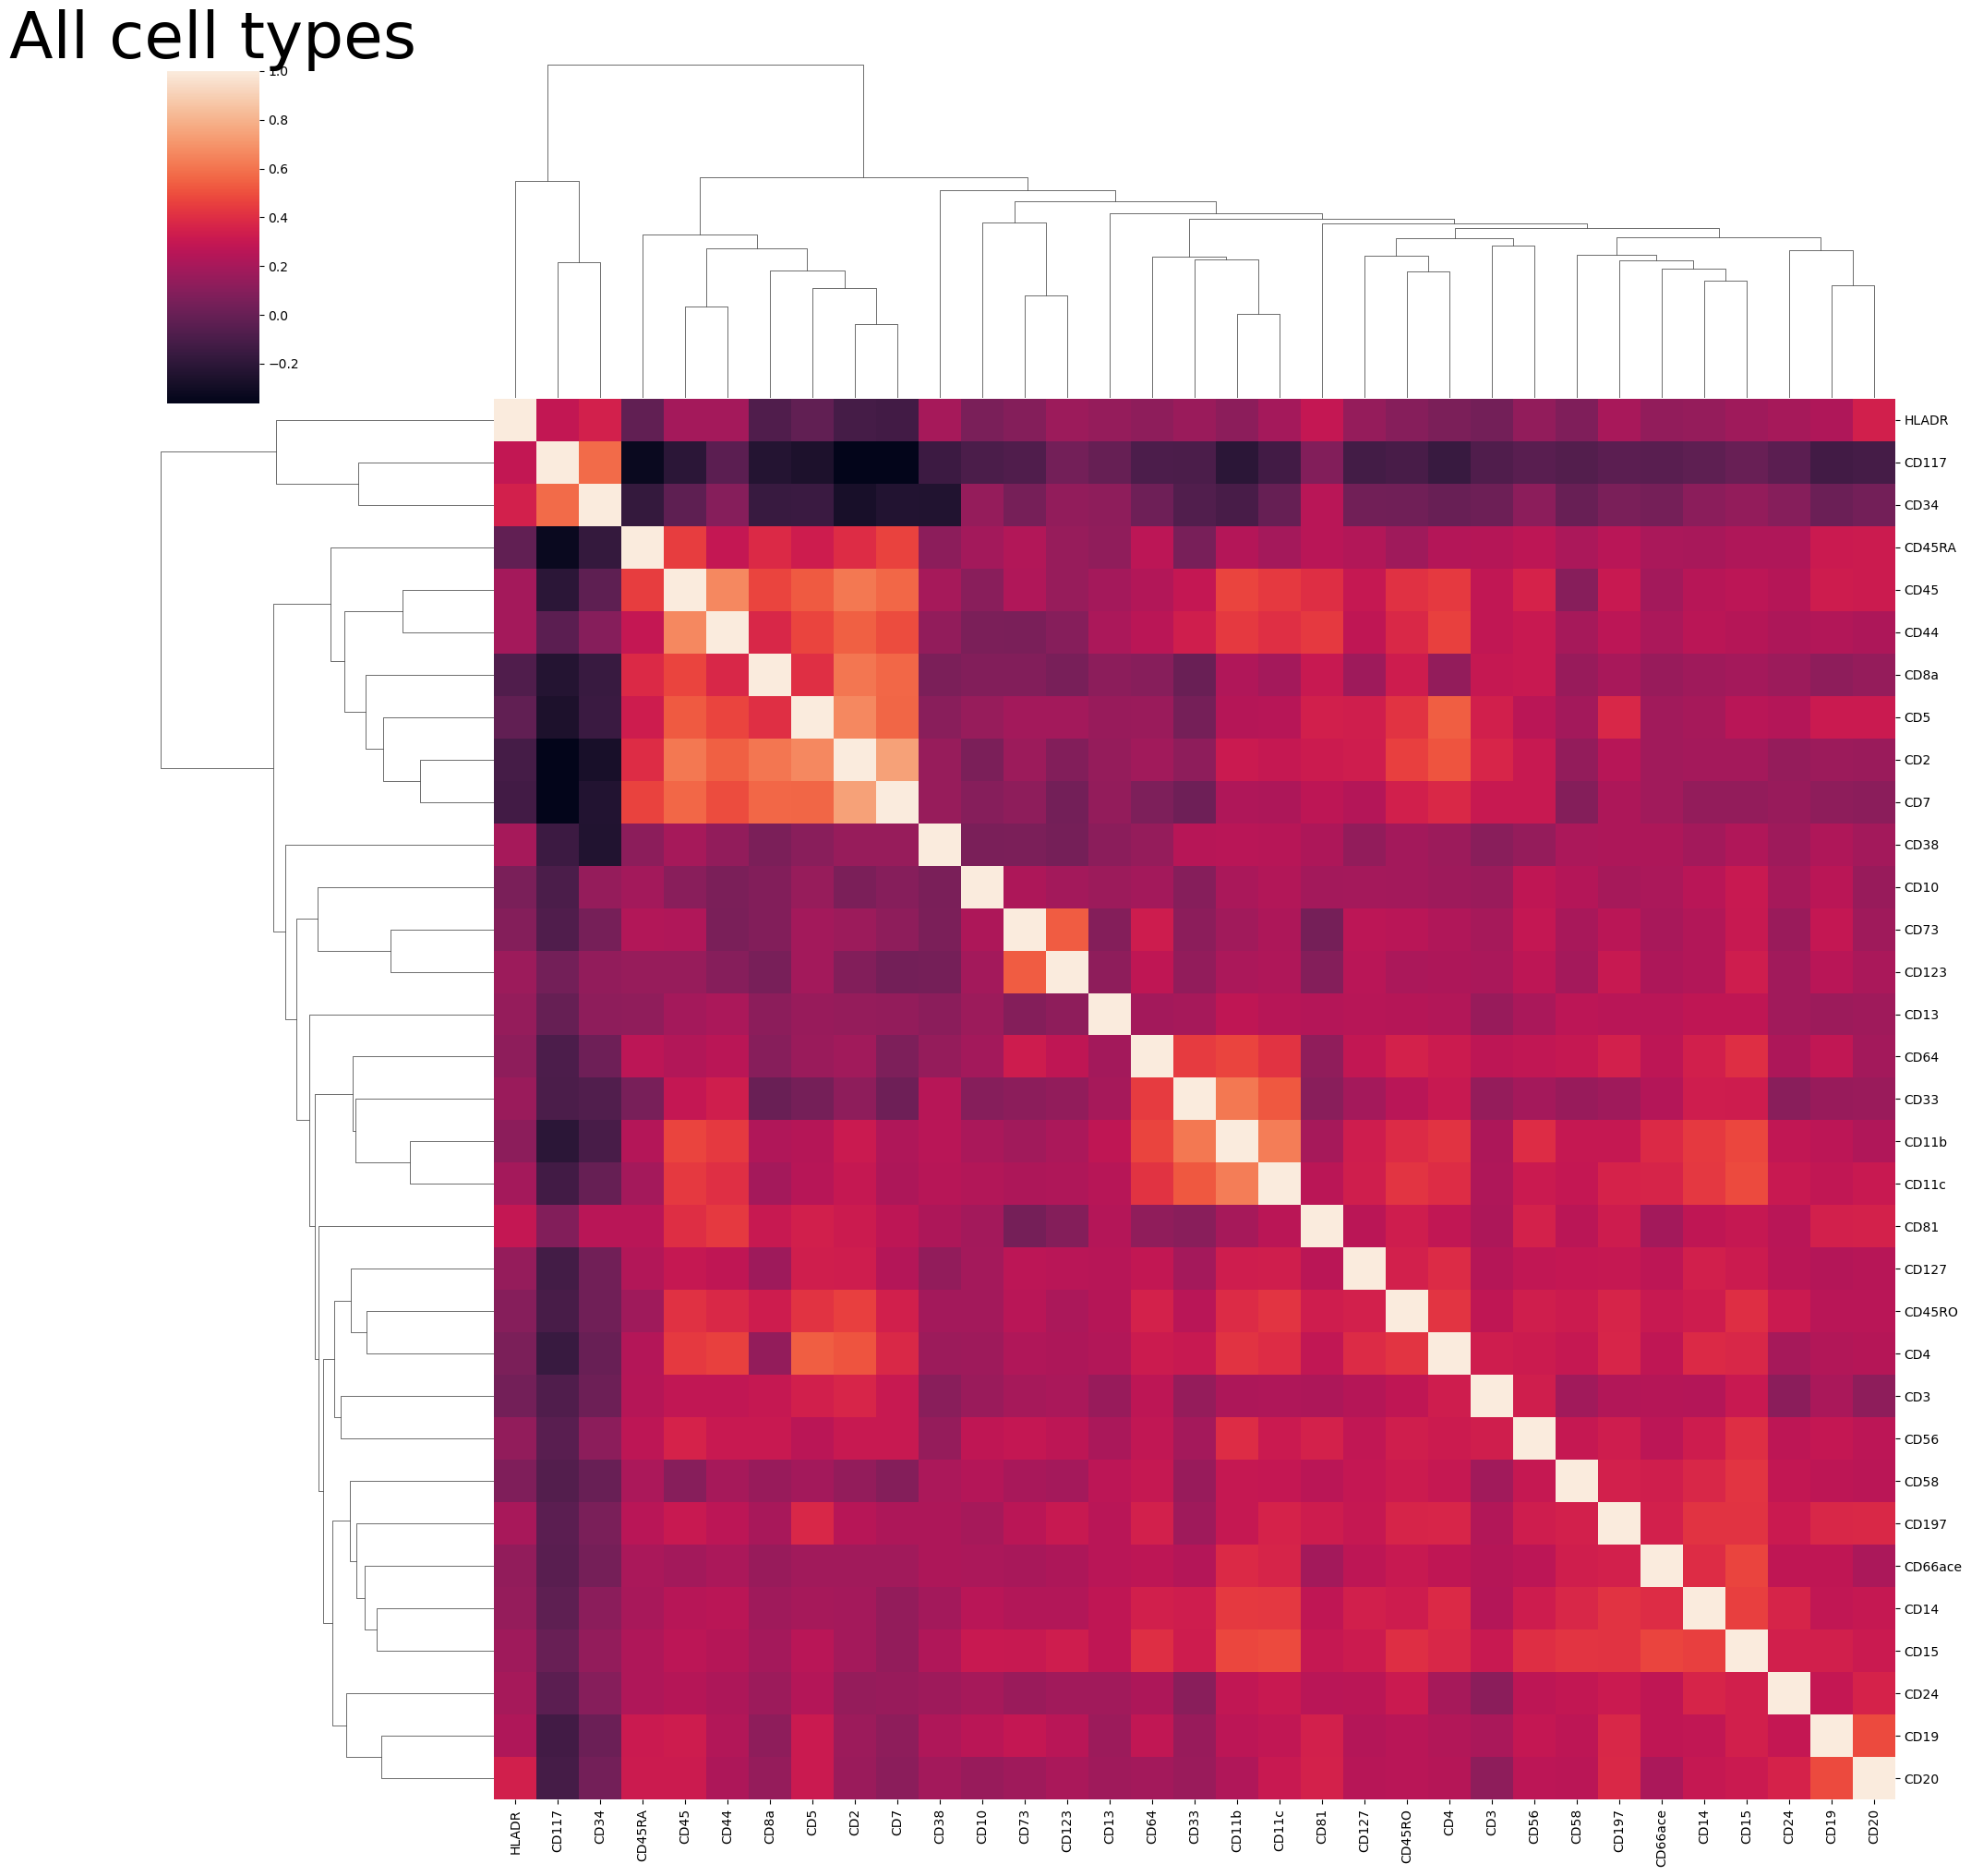

In [26]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



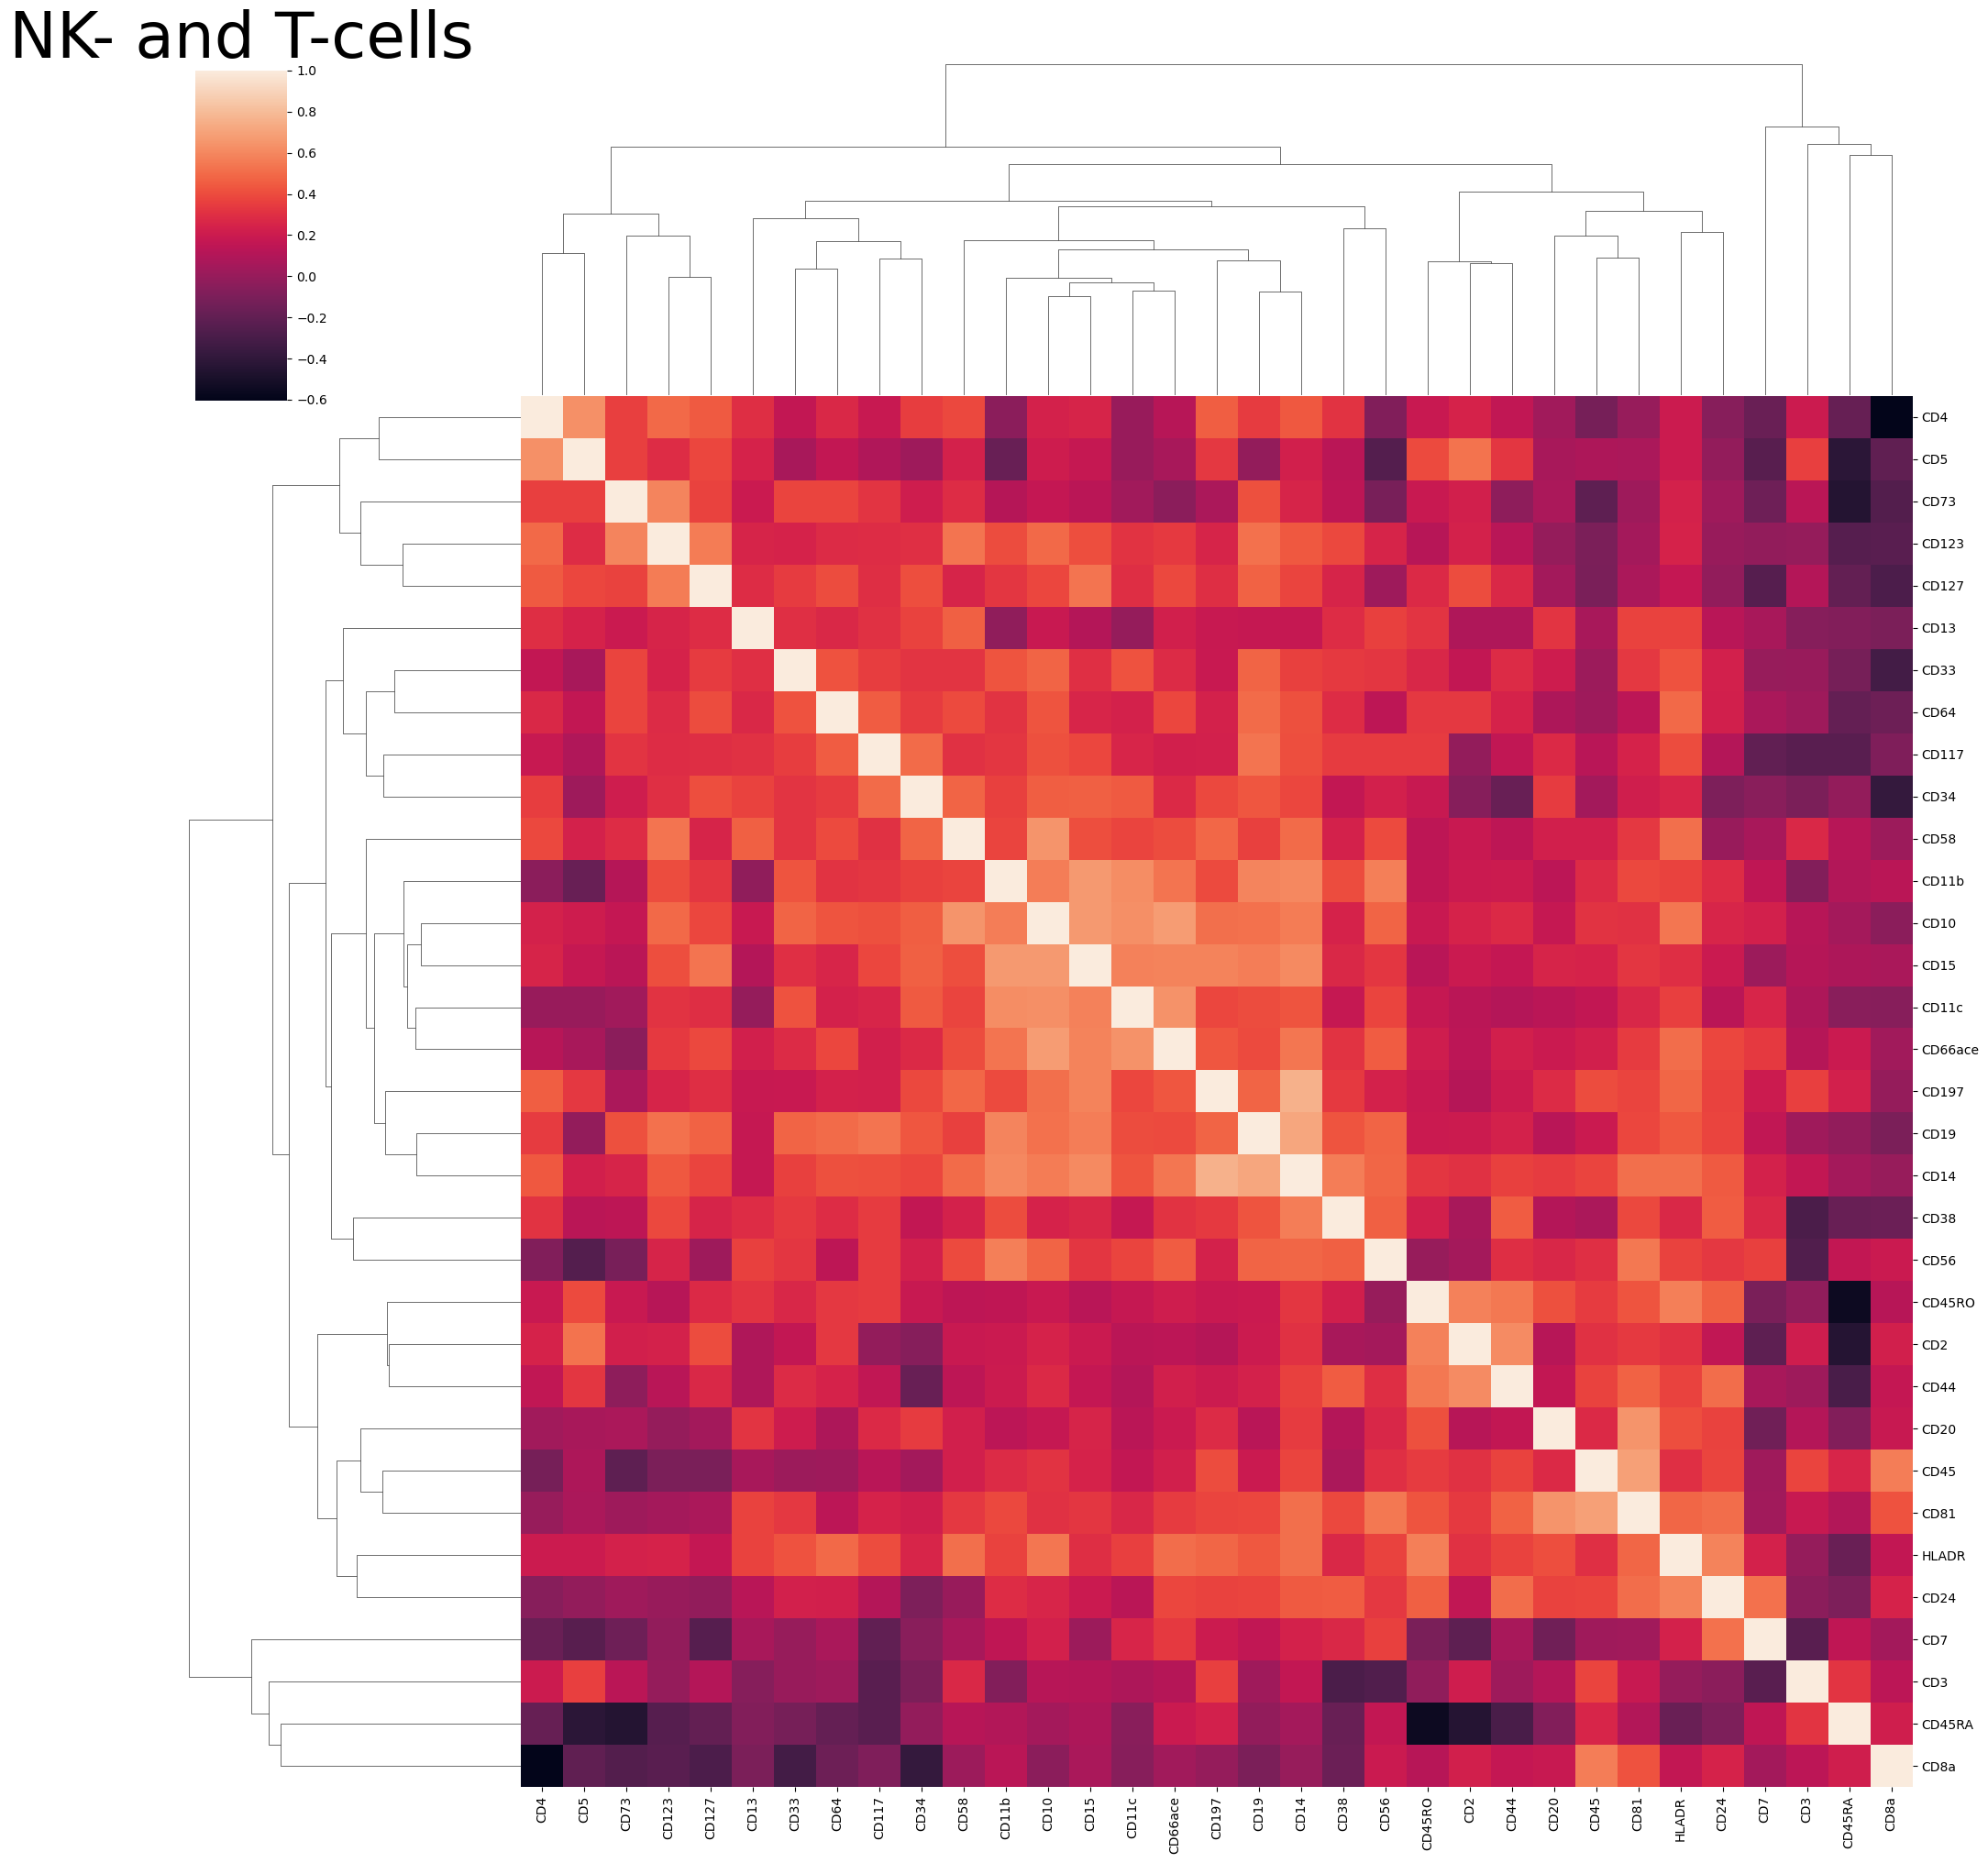

In [27]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK- and T-cells', fontsize = 50) ;


In [28]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 681 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [29]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGGTCTAGCCG-1-101,preleukemic,1605,0.106839,0.251541,3407.0,NaN,NaN,NaN,NaN,False,...,0.279965,0.724415,1.287655,11.345265,0.436078,6.326301,0.445026,2.503593,2.854841,6.571559
AAAGATGAGGGCTTCC-1-101,preleukemic,1442,0.068451,0.376331,3287.0,NaN,NaN,NaN,NaN,False,...,-0.168152,1.971721,-0.543954,12.956930,1.556451,4.454599,0.596704,0.927235,0.272517,4.783737
AAAGATGCATGGGAAC-1-101,non-leukemic?,4370,0.056573,0.353839,18401.0,NaN,NaN,NaN,NaN,False,...,-1.169381,-2.410559,-1.782377,10.193249,-1.618040,2.307451,-2.761306,-1.252544,-0.508524,-2.086227
AAAGCAACAGATAATG-1-101,preleukemic,4108,0.023593,0.482913,20981.0,NaN,NaN,NaN,NaN,False,...,2.465397,2.442233,1.024252,9.752147,0.436078,4.972959,0.288205,-1.252544,0.991005,6.892483
AAATGCCTCAAAGACA-1-101,preleukemic,4368,0.029612,0.438065,20465.0,NaN,NaN,NaN,NaN,False,...,-1.169381,0.056123,-0.189659,8.379899,-0.871832,5.185529,-0.042347,-0.430576,-1.364058,4.931305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCCCTCAGT-1-101,preleukemic,4197,0.022735,0.460623,17726.0,NaN,NaN,NaN,NaN,False,...,0.279965,-0.125371,0.746604,11.047505,-1.618040,6.445681,0.125881,0.288358,-1.364058,7.578999
TTTCCTCTCGGCTACG-1-101,preleukemic,3276,0.013090,0.446258,12681.0,NaN,NaN,NaN,NaN,False,...,1.092916,-0.922649,-0.543954,8.475853,1.016288,3.655530,1.288401,-0.826869,0.272517,5.352837
TTTGCGCGTTAAGGGC-1-101,non-leukemic?,4535,0.027661,0.402707,21872.0,NaN,NaN,NaN,NaN,False,...,2.148498,2.212325,0.141761,0.707047,1.556451,6.445681,2.422279,2.503593,-0.508524,6.347353
TTTGCGCTCTGTCCGT-1-101,preleukemic,3558,0.025139,0.516925,17105.0,NaN,NaN,NaN,NaN,False,...,1.815341,2.093422,2.634956,9.902936,-0.871832,2.947185,1.658660,2.728876,1.656222,3.984040


In [30]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 34 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [31]:
adata_nk.obs["CD56"]

AACCGCGGTTGTGGCC-1-101    5.187955
ACATACGCAGACGCTC-1-101   -0.887961
ACCCACTTCTCGTATT-1-101    0.720875
AGATTGCAGCAGATCG-1-101    2.321322
CAAGGCCCATTCGACA-1-101   -0.126113
CAGCTAAAGCGAGAAA-1-101    2.184905
CAGGTGCGTCTCTCGT-1-101    2.453666
CATCAGAAGCCGATTT-1-101    3.696303
CCGGTAGAGATGAGAG-1-101    0.909550
CGGACTGGTCCTCCAT-1-101    1.264396
CGTCTACCACTACAGT-1-101    2.582174
CTCGAGGTCGTCCGTT-1-101    2.044156
CTGCCTAAGCCTATGT-1-101   -0.365804
GAACGGAAGTCAAGGC-1-101    0.720875
GATCTAGGTTCGAATC-1-101    1.090523
GCAGTTACAAGAAGAG-1-101    0.909550
GCGACCACAAACTGTC-1-101    3.494759
GCGCAGTCAAAGCAAT-1-101    0.101281
GCGCGATAGTAGCCGA-1-101    1.748500
GCTGCGATCACTTACT-1-101   -0.126113
GGAAAGCAGACAGAGA-1-101    0.317578
GGAAAGCGTTCGGCAC-1-101    0.317578
GGGCATCAGGGAACGG-1-101    3.596677
GGTGAAGTCGGACAAG-1-101    0.909550
GTCTCGTTCACGACTA-1-101    0.101281
GTTTCTATCGGAAACG-1-101    1.090523
TACGGTATCACTGGGC-1-101    0.101281
TCGTACCTCGCCTGTT-1-101    0.523811
TGACGGCTCTTCCTTC-1-1

In [32]:
#NK-cell markers

markers=["CD56"]

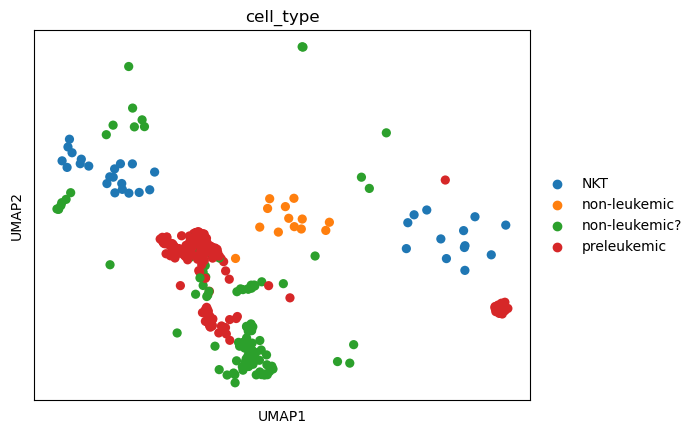

In [33]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

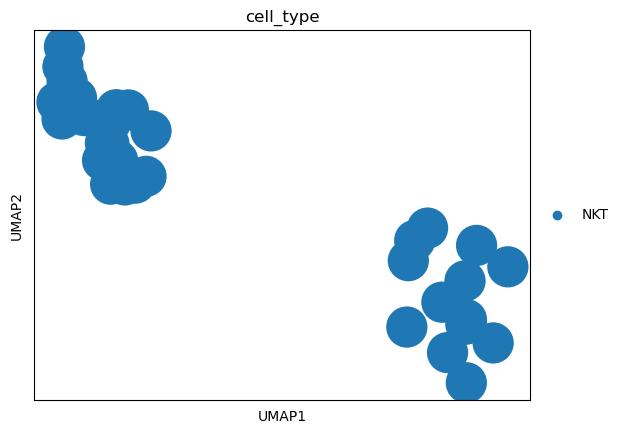

In [34]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

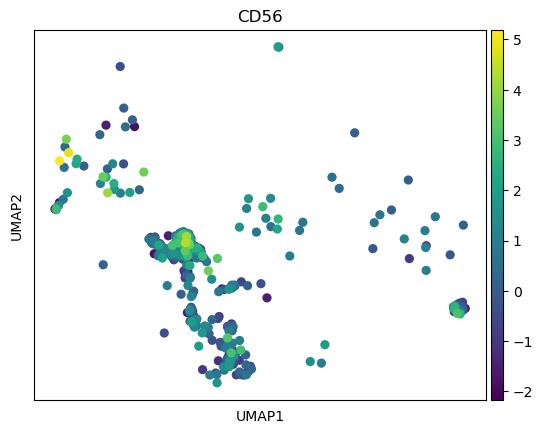

In [35]:
#All cell types

sc.pl.umap(adata_sample, color= markers, color_map= 'viridis')

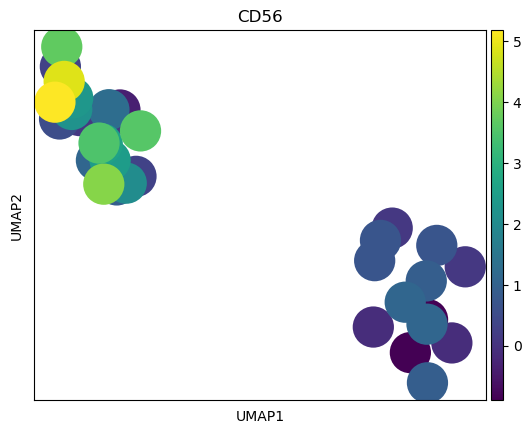

In [36]:
#NK and T-cells

sc.pl.umap(adata_nk, color = markers, color_map = 'viridis')

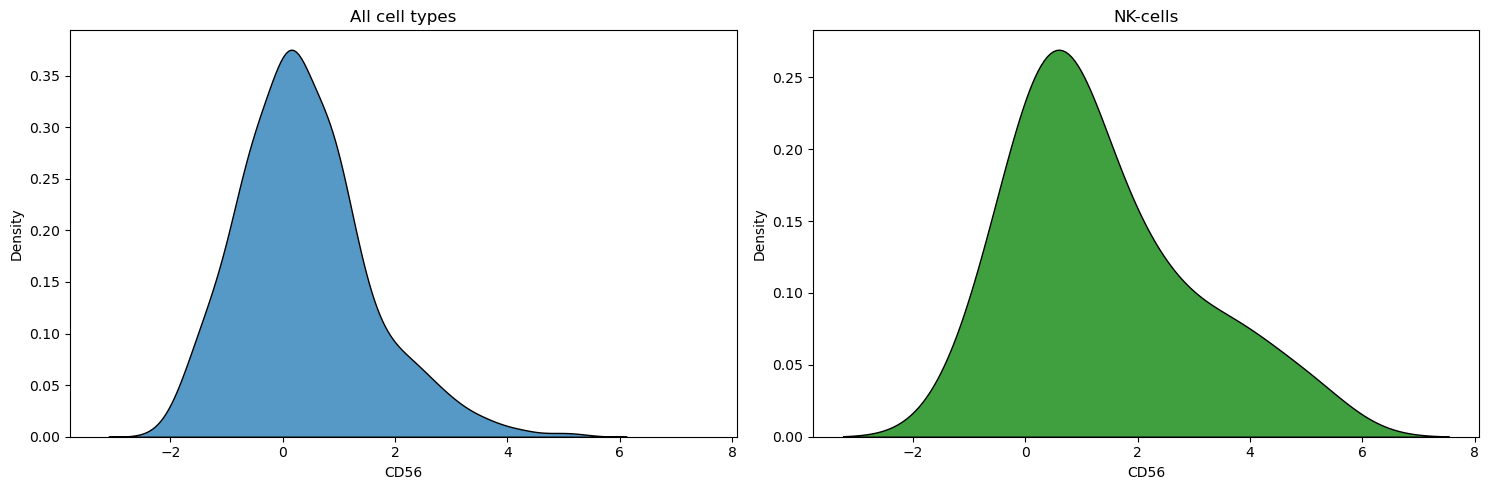

In [37]:
#NK and T-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

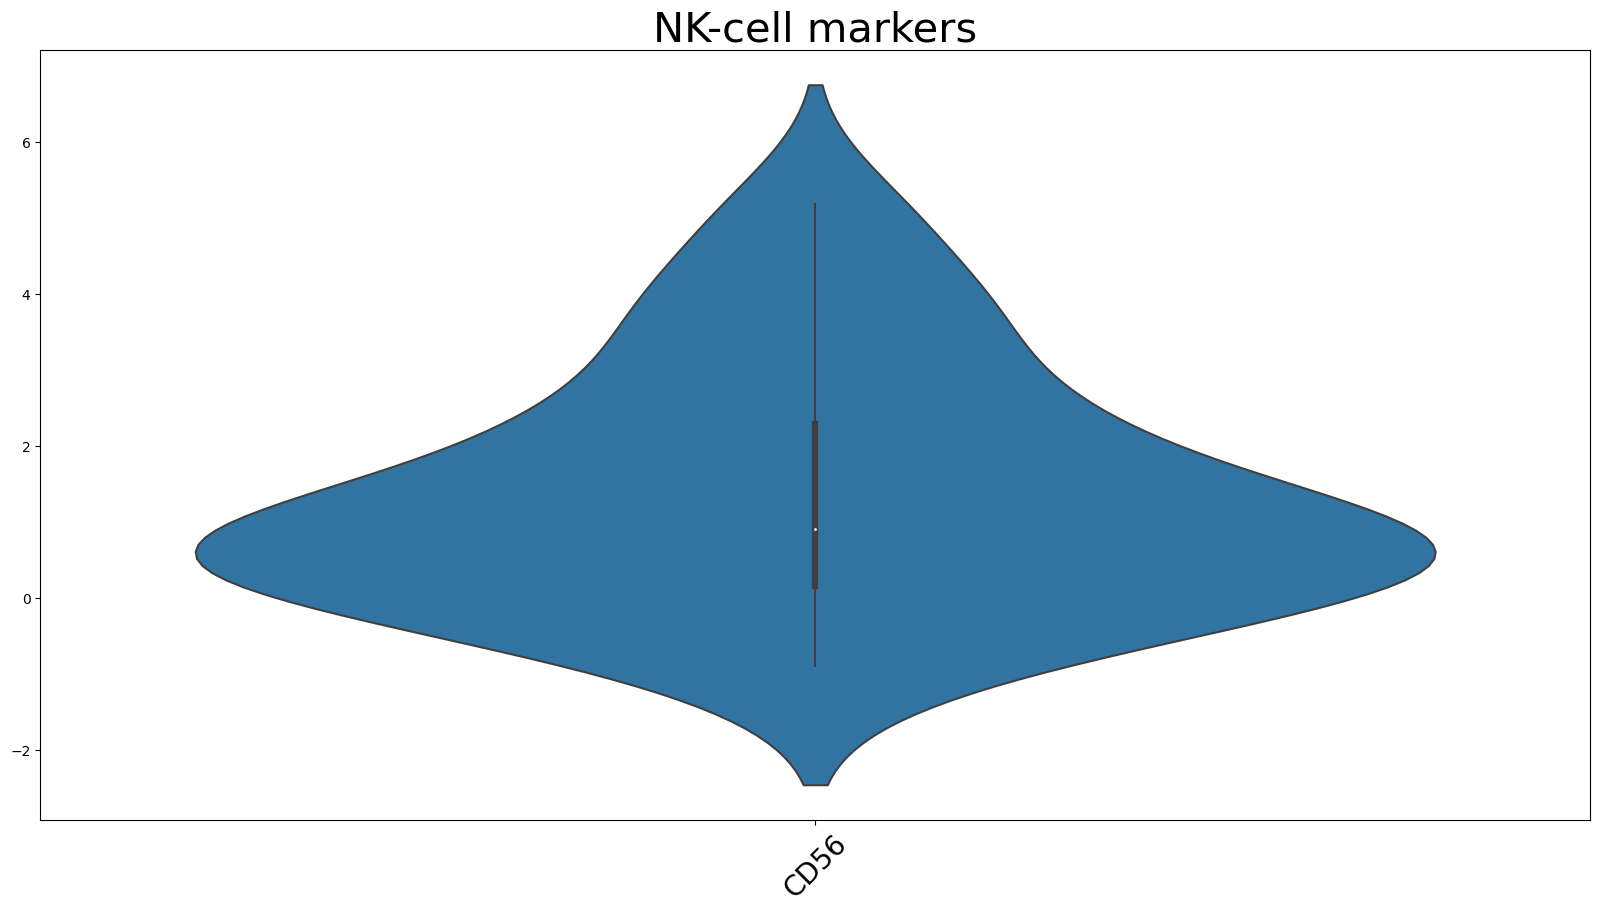

In [38]:
#NK markers

plt.figure(figsize=(20,10))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK-cell markers", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)